In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# matplotlib parameters to ensure correctness of Chinese characters 
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.sans-serif']=['Arial Unicode MS', 'SimHei'] # Chinese font
plt.rcParams['axes.unicode_minus']=False # correct minus sign

plt.rcParams["font.size"] = 16
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

In [2]:
x=np.linspace(-4,4,1000)
def gauss(x,sigma=1):
    return np.exp(-x**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)


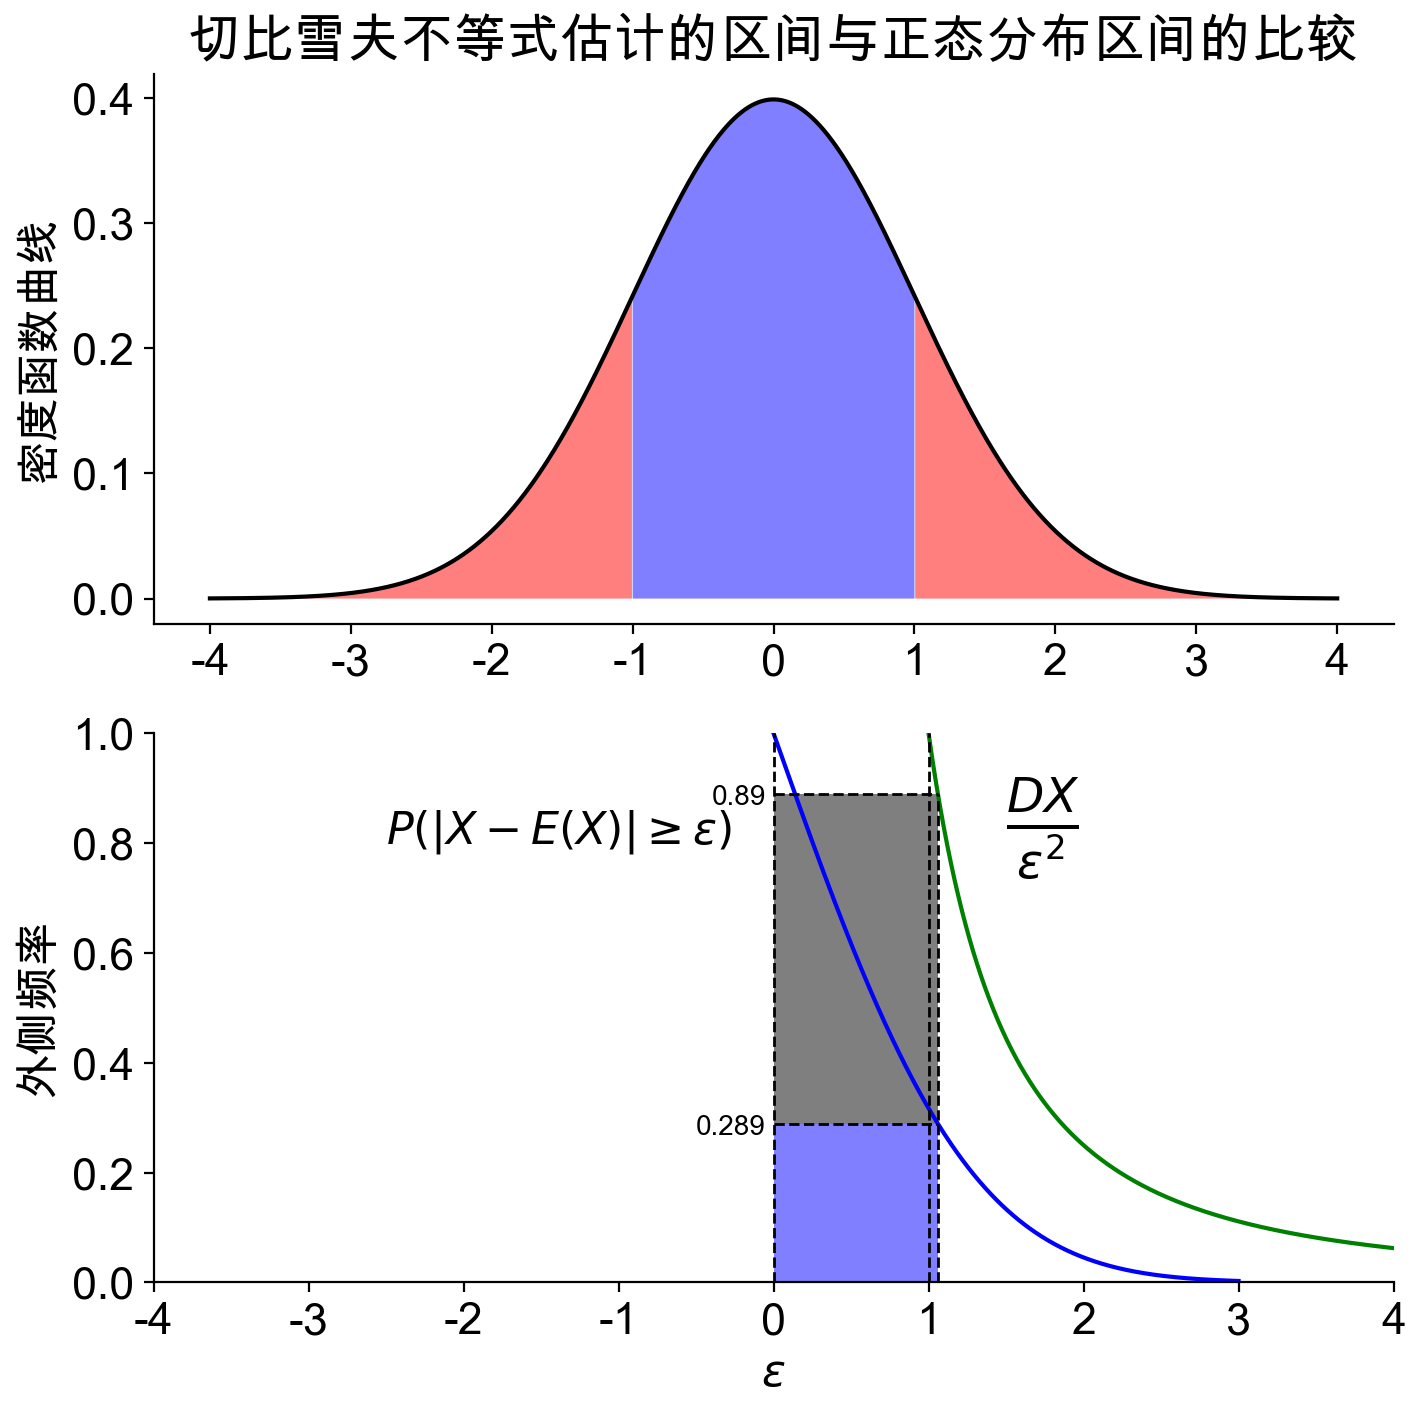

In [50]:
fig = plt.figure(figsize=(8,8),dpi=200)
#spec2 = gridspec.GridSpec(ncols=2, nrows=1, left=0.08, right=0.92, top=0.32, bottom=0.08, wspace=0.15, figure=fig)
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)
ax.plot(x,gauss(x), color='k', zorder=1)
epsilon=1.0
sigma=1
x1=np.linspace(-1,1,250)
ax.fill_between(x1, 0,gauss(x1,sigma), fc='b', alpha=0.5)
ax.fill_between(x[x>=epsilon], 0,gauss(x[x>=epsilon],sigma), fc='r', alpha=0.5)
ax.fill_between(x[x<=-epsilon], 0,gauss(x[x<=-epsilon],sigma), fc='r', alpha=0.5)
ax.set_ylabel("密度函数曲线")
ax.set_title("切比雪夫不等式估计的区间与正态分布区间的比较")

from scipy.stats import norm
ax1.set_xlim(-4,4)
ax1.set_ylim(0,1)
epsilon=np.linspace(1,4,500)
def f1(x):
    return 1.0/x**2
ax1.plot(epsilon,f1(epsilon),color='g')
x2=np.linspace(0,3,500)
def f2(x):
    return (1-norm.cdf(x))*2
ax1.plot(x2,f2(x2),color='b')

ax1.plot([0,0], [0,1], lw=1, ls="--",color='black')
ax1.plot([1,1], [0,1], lw=1, ls="--",color='black')
ax1.plot([1.06,1.06], [0,0.89], lw=1, ls="--",color='black')
ax1.plot([0,1.06], [0.89,0.89], lw=1, ls="--",color='black')
ax1.plot([0,1.06], [0.289,0.289], lw=1, ls="--",color='black')

x3=np.linspace(0,1.06,250)
ax1.fill_between(x3, 0.289,0.89, fc='black', alpha=0.5)
ax1.fill_between(x3, 0,0.289, fc='b', alpha=0.5)

ax1.text(-0.4,0.87,'0.89',fontsize=10)
ax1.text(-0.5,0.269,'0.289',fontsize=10)
ax1.text(1.5,0.8,r'$\frac{DX}{\varepsilon^2}$',fontsize=25)
ax1.text(-2.5,0.8,r'$P(|X-E(X)|\geq \varepsilon )$')
ax1.set_ylabel("外侧频率")
ax1.set_xlabel(r'$\varepsilon$')

plt.savefig('fig2.png',dpi=200)

In [40]:
(1/0.89)**0.5

1.05999788000636

In [41]:
f2(1.06)

0.2891445993278192